## ROUTING OPTIMISATION FOR AERONAUTICAL NETWORKS


<h5>Thendral Dhanabalan</h5>
Unit Title: Search and Optimisation (COMP7065) <br>
Department of Science and Technologies <br>
Bournemouth University <br>
s5439431@bournemouth.ac.uk <br>

**ALGORITHM USED: ANT COLONY OPTIMISATION (ACO) AND DIJKSTRA'S ALGORITHM**

**INTRODUCTION:**

Wireless communication and accessing the internet are playing an important role in the day-to-day life of Humans. Eventually, this networking relies on 4G or 5G of the wireless mobile system (D. Medina and F. Hoffmann,2011). However, transmitting the data or using the internet above the clouds is not possible. This paper illustrates a solution to the given North-Atlantic aeroplane dataset containing the aircraft's details and its data transmission table to make provision for internet access to the passengers in the aircraft (Stu¨tzle, T., & Dorigo, M, 1999). 

Normally, only in some flights WiFi depends on cellular or satellite systems and much communication over the cloud relay on either satellite or cellular medium due to it's higher end-to-end latency (D. S. Lakew, U. Sa’ad, N.-N. Dao, W. Na, and S. Cho,2020), and has the limitation of message transmission (E. Sakhaee, A. Jamalipour, and N. Kato, 2006). In the given assignment, there are network nodes between the aircraft which are capable of transmitting messages from the Ground Station. To solve the optimisation problem, we can use certain optimisation techniques to find the optimal shortest path from the node to node. 

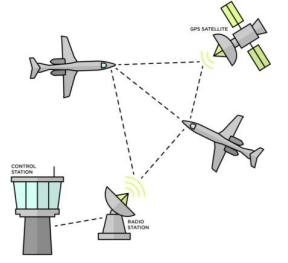
       

**PROBLEM STATEMENT:**

There are many promising solutions to strengthen internet access over the cloud while passengers travel in Aircraft. The major challenge is the optimisation technique for routing the network in large means (E.L. Lawler, J.K. Lenstra, A.H.G. Rinnooy Kan, and D.B. Shmoys, 1986). This paper illustrates, the best possible solution for multi-objective optimisation and single-objective optimisation with end-to-end latency, the best shortest optimised path, and processing time. In short, the optimisation is done with adaptive distance coding and plotting the links of the shortest path using the algorithm.


**METHODOLOGY:**

Routing Optimisation for Aeronautical Networks is a similar concept to the Travelling Salesman Problem(TSP), but the difference is to find the distance with Latitude, Longitude and Altitude as the geographical location between the aircraft and TSP finds the city-to-city travel. So, here is the problem, there are many possible routes, but we aim to find the best-shorted distance and the path that the network should migrate (Talan K, and Bamnote G R, 2015). This paper gives a complete understanding of Ant Colony Optimisation working with a relevant problem and the Dijkstra Algorithm is used to make a comparison over the obtained solutions. Let's start optimising the networks.





**EXPLORING THE DATA:**

Firstly, we have to import the given dataset by using pandas library. "df" is the variable name given to dataset and it was printed to verify the entire data.

In [10]:
import pandas as pd
import csv
from collections import defaultdict
import math 
from tabulate import tabulate
import bisect

df = pd.read_csv('NA_13_Jun_29_2018_UTC13.CSV',  delimiter=',', skiprows=0, low_memory=False)
print(df)

    Flight No.   Timestamp  Altitude  Latitude  Longitude
0        AA101  1530277200   39000.0      50.9      -38.7
1        AA109  1530277200   33000.0      60.3      -12.2
2        AA111  1530277200   39000.0      52.7      -18.1
3        AA113  1530277200   37000.0      43.0      -11.1
4        AA151  1530277200   36400.0      47.0      -27.7
..         ...         ...       ...       ...        ...
211      UA971  1530277200   32000.0      60.9      -29.9
212      UA973  1530277200   33000.0      61.0      -39.3
213      UA975  1530277200   36000.0      50.5      -26.4
214      UA986  1530277200   36000.0      60.0      -32.2
215      UA988  1530277200   36100.0      52.7      -18.8

[216 rows x 5 columns]


As shown in the above output, there are 215 fights with different Timestamp, Altitude, Latitude and Longitude.

**TRANSMISSION TABLE:**

In the problem, the transmission rate between the aircraft's distance is given. So as per the table given we use tabulate to tabulate the given transmission rate data.

In [11]:
import csv
from collections import defaultdict
import math 
from tabulate import tabulate
import bisect
#columns = defaultdict(list) # each value in each column is appended to a list

transmissionTable = [
        (1, "Red", 500, 31.895), 
        (2, "Orange", 400, 43.505), 
        (3, "Yellow", 300, 52.857), 
        (4, "Green", 190, 63.970), 
        (5, "Blue", 90, 77.071), 
        (6, "Pink", 35, 93.854), 
        (7, "Purple", 5.56, 119.130)
                    ]
#define header names
col_names = ["Mode k", "Mode color", "Switching threshold(km)", "Transmission rate(Mbps)"]
#display table
print(tabulate(transmissionTable, headers=col_names, tablefmt="fancy_grid"))

╒══════════╤══════════════╤═══════════════════════════╤═══════════════════════════╕
│   Mode k │ Mode color   │   Switching threshold(km) │   Transmission rate(Mbps) │
╞══════════╪══════════════╪═══════════════════════════╪═══════════════════════════╡
│        1 │ Red          │                    500    │                    31.895 │
├──────────┼──────────────┼───────────────────────────┼───────────────────────────┤
│        2 │ Orange       │                    400    │                    43.505 │
├──────────┼──────────────┼───────────────────────────┼───────────────────────────┤
│        3 │ Yellow       │                    300    │                    52.857 │
├──────────┼──────────────┼───────────────────────────┼───────────────────────────┤
│        4 │ Green        │                    190    │                    63.97  │
├──────────┼──────────────┼───────────────────────────┼───────────────────────────┤
│        5 │ Blue         │                     90    │                    7

The given transmission table has a Switching threshold(km) and Transmission rate(Mbps), so if the distance in km is between 500 to 400, then the transmission rate should be 31.895. So, the upcoming code will show how to calculate the distance and find the transmission rate.

**DISTANCE CALCULATION:**

Now, to start calculating the distance we must copy the Latitude, Longitude, and Altitude from the dataset. Thereby, using the below distance equation we can able to calculate the distance from the geographical location in KM.

$$D = sqrt( (x1-x0)^2 + (y1-y0)^2 + (z1-z0)^2 )$$



In [12]:
#transferring all the geographic location of the given aircrafts

LatitudeData = df.Latitude.copy()
LongitudeData = df.Longitude.copy()
AltitudeData = df.Altitude.copy()

#calculate the distance

rE = 637100
 # The radius of earth

Altitude_a = AltitudeData[0] * 0.3048  # get altitude and convert foot to meter
Altitude_b = AltitudeData[1] * 0.3048  # get altitude and convert foot to meter

Latitude_a = LatitudeData[0] # get latitude
Latitude_b = LatitudeData[1] # get latitude

Longitude_a = LongitudeData[0] # get longitude
Longitude_b = LongitudeData[1] # get longitude

# The below code is to convert (altitude, latitude, longitude) to 3D Cartesian coordinates
p_xa = (rE + Altitude_a) * math.cos(math.radians(Latitude_a)) * math.cos(math.radians(Longitude_a))  
p_ya = (rE + Altitude_a) * math.cos(math.radians(Latitude_a)) * math.sin(math.radians(Longitude_a))  
p_za = (rE + Altitude_a) * math.sin(math.radians(Latitude_a))  

p_xb = (rE + Altitude_b) * math.cos(math.radians(Latitude_b)) * math.cos(math.radians(Longitude_b))  
p_yb = (rE + Altitude_b) * math.cos(math.radians(Latitude_b)) * math.sin(math.radians(Longitude_b))  
p_zb = (rE + Altitude_b) * math.sin(math.radians(Latitude_b))  

# calculate the distance between aircraft a and aircraft b
distance_in_m = math.sqrt((abs(p_xa - p_xb)) ** 2 + (abs(p_ya - p_yb)) ** 2 + (abs(p_za - p_zb)) ** 2)
print('Distance in M', distance_in_m)
distance_km = distance_in_m / 1000
print('Distance in KM', distance_km)

Distance in M 197129.18747044285
Distance in KM 197.12918747044284


**FITTING THE TRANSMISSION TABLE:**

After calculating the distance the very next step is to fit the transmission rate to the absolute distance. The speed rate depends on the range of the transmission rate and the distance threshold given in the transmission table. As of now, I fixed a distance and evaluated the perfect transmission rate. 

In [13]:
#transmission rate range 
speed_rate = []    

#finding the range of distance
for x in range(218):
    for y in range(2187):  
        if 0 < distance_km < 5561:  #if the distance is within 5561, it should print 119.30 as speed rate
            speed_rate = 119.130
        elif 5561 < distance_km < 35000:  #if the distance is within 35000, it should print 119.130 as speed rate
            speed_rate = 119.130
        elif 35000 < distance_km < 90000: #if the distance is within 90000, it should print 93.854 as speed rate
            speed_rate = 93.854
        elif 90000 < distance_km < 190000: #if the distance is within 190000, it should print 77.071 as speed rate
            speed_rate = 77.071
        elif 190000 < distance_km < 300000: #if the distance is within 300000, it should print 63.970 as speed rate
            speed_rate = 63.970
        elif 300000 < distance_km < 400000: #if the distance is within 400000, it should print 52.857 as speed rate
            speed_rate = 52.857
        elif 400000 < distance_km < 500000: #if the distance is within 500000, it should print 43.505 as speed rate
            speed_rate = 43.505
        elif 500000 < distance_km < 740000: #if the distance is within 740000, it should print 31.895 as speed rate
            speed_rate = 31.895
        else:
            speed_rate = 0   #none of above conditions follows, it should print 0

# checking the distance value to find the speed_rate
distance_km = speed_rate
print(distance_km)

119.13


The output value is 119.13, since the distance is 2187. Now, let's quickly observe the graph and move into algorithms.

**PLOTTING THE AIRCRAFTS POSITION:**

To plot the aircraft position with it's Latitude and Longitude from the given dataset on the North-Atlantic map, I used basemap and imported it's libraries.  

In [14]:
!pip install basemap
!pip install basemap-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


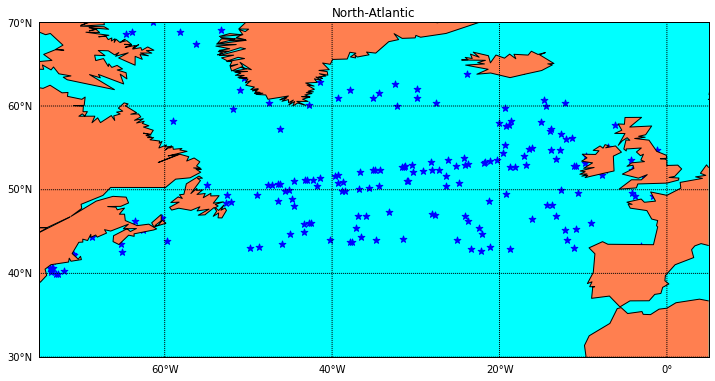

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np 

fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5

#basemap project is imported from the mpl_toolkit
m = Basemap(projection='cyl',llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon,
            lat_1=10,lat_2=20,lat_0=50,lon_0=-10,resolution='c')

m.drawcoastlines()

m.fillcontinents(color='coral',lake_color='aqua')  # add coastlines
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)
m.drawmapboundary(fill_color='aqua')

#importing given latitude and longitude data
x, y = m(LongitudeData, LatitudeData)  # transform coordinates  
plt.scatter(x, y, 50, marker='*', color='blue') 


plt.title("North-Atlantic")
plt.show()

As show in the above output, the aircrafts are plotted. Now we should start initiating the algirithm to optimise.

**ANT COLONY OPTIMISATION (ACO):**

ACO is used for complex multi-objective (cluster)and single-objective (cluster)optimisation since it is based on population metaheuristics. Just like the real ants, it is capable to find the shortest route between the nest and the source of food. It was first applied in Travelling Salesman Problems (TSP), vehicle routing problems, RNA structure prediction and stock cutting to find the minimal distance to deliver the packages to multiple cities (M. Dorigo et L.M. Gambardella, 1997).

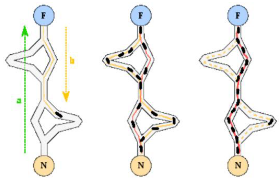

**REASON AND PROCEDURE TO CHOOSE ACO:**


*   Ants with their colony normally use its single decentralized intelligence to find food, we will follow its pattern of finds.
*   The queen in the ant colony has updates on the whole colony every minute. Every ant has neuron cells as we human has.
*   Communication between the scout ants is done by using "pheromones", for every trail routes the ants leave a pheromone on the track once the food is found.
*   Scout then recommends the ants to walk in the direction of food by following their strongest pheromone.
*   By following the track, the ant tries to find the shortest route by moving around the route to get the food back home and if it confirmed their shortest route, they will strengthen the pheromone on the track.

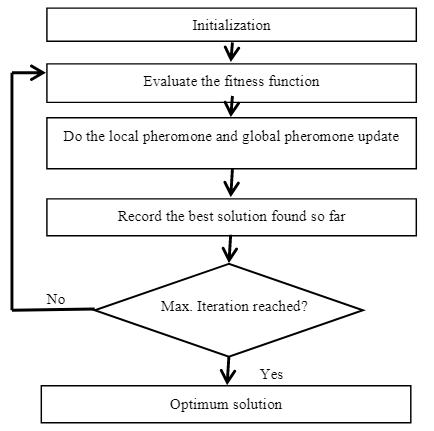


**STEPS AND EQUATIONS:**

**- PROBABILITY OF ANTS MOVEMENT**

Probability of the ants to complete the trail routes with the repeated nodes. 

$$P_{ij}(t)=\frac{\tau_{ij}^\alpha + \eta_{ij}^\beta}{\sum (\tau^\alpha + \eta^\beta)} $$

tau - Pheromones; 𝜂 - inverse of the distance; alpha, beta - parameters. 

**- PHEROMONES DEPOSIT**

When ants move from soure to desitination it leaves pheromone on it's way. On the other hand, other ants follows the route of the before pheronmone path. 

$$\tau^{(i+1)} = \tau^i + \Delta\tau $$

Δ𝜏 - parameter; i - iteration number

**- PHEROMONES EVAPORATES**

After completing every iteration the pheromones are evaporated, we also need to find the evaporation. 

$$\tau^{(i+1)} = (1 - \rho)\tau^i $$

𝜌 - evaporation rate 

**- END THE TASK**

We can end the condition by completing the search with the threshold. In that condition, the final output will depend on the iterations. 

**ANT COLONY OPTIMISATION ALGORITHM:**

Let's start initiating the distance matrix using our geographic location using haversine and follow up the code for more detailed steps of execution.

In [16]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
#ANT COLONY OPTIMISATION
import pandas as pd
import numpy as np
from haversine import haversine, Unit
import random, sys, time, math
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')

In [18]:
#Ant Colony Optimisation Algorithm
class ACO():
    def __init__(self):
        self.y = []
        self.z = []

#### calculating the distance ####

    def calculate_distance(self, paths):
        total_distance = 0
        _distance = distance 
        x = paths[0]
        for p in range(len(paths)): 
            i = paths[p]
            total_distance += _distance[x][i]
            if verbose:
                print(x, i, _distance[x][i], total_distance)
            x = i
##### distance calculation while ant takes each trail in multi or single objective #####
        if verbose:
            print(total_distance)
        return total_distance
    

### Next step is the fit the variables like population, iterations, distance ###
# nk - number of k = ants
# maxIterations
# beta - Heuristic constant
# zeta - local Pheromone decay
# rho - global Pheromone decay
# q0 - randomnize

    def Fit(self, distance, nk=10, maxIterations=100, beta=2, zeta=0.1, rho=0.2, q0=0.7, plot=False, verbose=False):
        _distance = distance 
        X = distance[0]       # initialising the procedure with distance
        Y = X
        
######## initial phemorone #######
        total_distance = 0;
        x = 0
        for i in range(len(X)):    
            total_distance += _distance[x][i]
            x = i

        _pheromoneInitialValue = 1/total_distance
        if verbose:
            print(total_distance, _pheromoneInitialValue)
            print()

        _pheromone = []        
        for x in X:      
            result = [_pheromoneInitialValue for y in Y]
            _pheromone.append(result)

#### Start from random node of the given distance ####
        if depot == -1: 
            _depot = random.sample(range(0, len(df1)), nk)
        else:
            _depot = [depot] * nk  #finding the number of ants movements, it our case aircraft movement in distance

        if verbose:
            print('_depot')
            print(_depot)
            print()

### Now, we can predict the best path and distance with number of iterations  ###        
        best_paths = []
        best_distance = sys.float_info.max

# let's start the time, to find the completion time of the whole optimisation
        start_time_process = time.time()  

# Finding the path and the distance with maxIteration
        for it in range(maxIterations):
            best_current_paths = []

            best_current_distance = sys.float_info.max

# let's start the trails 
            total_node = 1
            exist = []
            for ant in range(nk):
                if verbose:
                    print()
                    print("Semut", ant, " ... ", _depot[ant])

                paths = []
                exist = [] 
                _from = _depot[ant]
                paths.append(_depot[ant])  # add the path found in the exsiting trail route, to make follow up route for other ants
                exist.append(_depot[ant])


                while len(paths) < len(df1):    
### check all node which are not visited yet ###
                    _posibleNode = []
                    for i in range(len(X)):
                        _exist = False
                        for x in exist:
                            if i == x:
                                _exist = True
                        if not _exist:
                            _posibleNode.append(i)     
                    _q0 = np.random.randn()
                    if _q0 <= q0:

# find the results of heuristic 
                        if verbose:
                            print("heuristic")

                        shortTransition = sys.float_info.max
                        __to = -1
                        for p in _posibleNode:
                            distanceValue = _distance[_from][p]  #getting the data from previous travel distance
                            pheromoneValue = _pheromone[_from][p] #getting the routes of previous ant travel
                            transitionValue = (1/pheromoneValue) * math.pow(distanceValue, beta)
                            if verbose:
                                print(_from, p, distanceValue, pheromoneValue, transitionValue)
                            if shortTransition > transitionValue:
                                shortTransition = transitionValue
                                _to = p

                        paths.append(_to)
                        exist.append(_to)
                        if verbose:
                            print('next: ', _to)  
                    else:    
                        # get by random
                        if verbose:
                            print("random")
                        _to = random.randint(0, len(df)) 
                        while _to in exist:
                            _to = random.randint(0, len(df)) 
                        paths.append(_to)
                        exist.append(_to)

                        if verbose:
                            print('next: ', _to)

### Apply local pheromone updating ###
                    pheromoneValue = _pheromone[_from][_to]
                    tau = (( 1 - zeta) * pheromoneValue) + _pheromoneInitialValue
                    _pheromone[_from][_to] = tau
                    _pheromone[_to][_from] = tau

                    _from = _to

                    if verbose:
                        print(paths)
                        print()

                distance = self.calculate_distance(paths)

#Findnig the best route with the current distance
                if best_current_distance > distance:  
                    best_current_distance = distance 
                    best_current_paths = paths


#After finding the distance, we need to find the best path
            if best_distance > best_current_distance:
                best_distance = best_current_distance
                best_paths = best_current_paths

            self.y.append(best_distance)
            self.z.append(best_current_distance)

######  Apply global pheromone updating ######
            __from = paths[0]
            for nn in range(len(paths)):
                __to = paths[nn]
                if __from != __to:
                    pheromoneValue = _pheromone[__from][__to]
                    tau = (( 1 - rho) * pheromoneValue) + _pheromoneInitialValue
                    _pheromone[__from][__to] = tau
                    _pheromone[__to][__from] = tau
                __from = __to


            print(it, " ... ", distance, ":", best_distance)

        #print()
        print("All Process --- %s seconds ---" % (time.time() - start_time_process))

        print(best_current_paths)
        print('Best path')
        print(best_paths)
        result = self.calculate_distance(best_paths)
        print('Best distance')
        print(result)
        print()
            
        return best_paths, result

##### Plottig #####
    def Plot(self):
        fig = plt.figure()
        ax = plt.axes()
        y = np.array(self.y)
        z = np.array(self.z)
        __w = np.average(self.z)
        w = [__w] * maxIterations
        w = np.array(w)
        x = np.linspace(0, maxIterations, maxIterations)
        ax.plot(x, y, z);
        ax.plot(x, w, z);

**EXECUTING ACO ALGORITHM:**

In [19]:
#find the time to finish the process
import time
start_time = time.time()

# Importing the file and result is stored in the new file
file_url = 'NA_13_Jun_29_2018_UTC13.CSV'
_file = file_url.strip(".csv")
file_result =  _file + '_Result_ACO.csv'
df = pd.read_csv(file_url)

# observing the dataset
_job = df.groupby('Timestamp')['Flight No.'].count().sort_values(ascending=[False])
print(_job)
print(len(_job))
print()

#max_capacity = 0
#for nc in range(len(_job)):
#     if _job[nc] > max_capacity:
#         max_capacity = _job[nc]
lat = df.Latitude.copy()
lng = df.Longitude.copy()
alt = df.Altitude.copy()

df1 = df[['Latitude', 'Longitude']]
#print(len(df1), " data processing ... ") 
#print()

depot_lat = 2.971718
depot_lng = 101.608376
depot = 0

_data = df[['Latitude', 'Longitude']]    
_data.loc[-1] = [depot_lng, depot_lat]  # adding a row
_data.index = _data.index + 1  # shifting index
_data.sort_index(inplace=True) 

df1 = _data[['Latitude', 'Longitude']]
problem = np.array(df1)

distance = []
for i in range(len(_data)):
    lat = _data.iloc[i]['Latitude']
    lng = _data.iloc[i]['Longitude']
    from_node = (lng, lat)
    result = []
    for j in range(len(_data)):
        lat = _data.iloc[j]['Latitude']
        lng = _data.iloc[j]['Longitude']
        to_node = (lng, lat)
        if i == 0:
            dist = 0
        elif j == 0:
            dist = 0
        else:
            dist = round(haversine(from_node, to_node, unit=Unit.METERS) * 2)
        result.append(dist/1000)
    distance.append(result)
    
#print(distance) 
#print()



nk = 5  # number of k = ants
maxIterations = 100
beta =  4  # Heuristic constant
zeta = 0.4 # local Pheromone decay   
rho = 0.2  # global Pheromone decay
q0 = 0.7   # randomnize
plot=False
verbose = False

#### APPLYING OPTIMISER AS ACO class ALGORITHM ####
optimizer = ACO()

best_paths, result = optimizer.Fit(distance, nk, maxIterations, beta, zeta, rho, q0, plot, verbose)
#optimizer.Plot()



######   convert into list New order  ######

_newCluster = [0] * len(df)
_newOrder = [0] * len(df)

_order = 1
for o in range(len(best_paths)):
    if o > 0:
        pos = best_paths[o]

        _newCluster[pos-1] = 0
        _newOrder[pos-1] = _order
        if verbose:
            print(o, pos)
            print(_newCluster)
            print(_newOrder)

        _order += 1

#print(_newCluster)
#print(_newOrder)
df['New Cluster'] = _newCluster
df['New Order'] = _newOrder
print("Result was saving ... ", file_result)
df.to_csv(file_result, index=False) 
print("--- %s seconds ---" % (time.time() - start_time))



Timestamp
1530277200    216
Name: Flight No., dtype: int64
1

0  ...  375870.47099999996 : 375870.47099999996
1  ...  404171.183 : 375870.47099999996
2  ...  451733.0879999999 : 325672.3829999999
3  ...  370050.5559999999 : 325672.3829999999
4  ...  401005.1610000002 : 291201.09400000004
5  ...  350628.8040000002 : 291201.09400000004
6  ...  498075.82299999986 : 291201.09400000004
7  ...  455310.8429999998 : 291201.09400000004
8  ...  414070.1050000001 : 291201.09400000004
9  ...  357123.598 : 291201.09400000004
10  ...  383954.2400000002 : 291201.09400000004
11  ...  393421.2050000001 : 291201.09400000004
12  ...  342509.7850000002 : 291201.09400000004
13  ...  384002.7710000002 : 291201.09400000004
14  ...  310771.271 : 291201.09400000004
15  ...  393225.19099999993 : 291201.09400000004
16  ...  390141.29400000017 : 291201.09400000004
17  ...  377713.58000000013 : 291201.09400000004
18  ...  379992.86300000007 : 291201.09400000004
19  ...  418191.1760000001 : 291201.09400000004
20  .

Above result, we used the fit method and got the best path, and best distance with 100 iterations and the result is stored in a file. Finally, we can also check the result of the convergence matrix for the obtained optimisation solution by plotting the optimizer. 

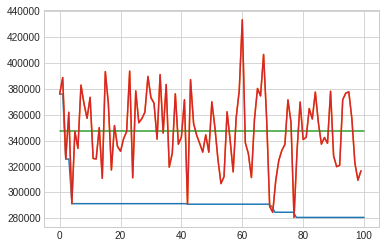

In [20]:
optimizer.Plot()

In [21]:
print("BEST PATH:",best_paths)

BEST PATH: [0, 1, 59, 159, 101, 206, 32, 99, 209, 22, 115, 138, 103, 118, 86, 57, 17, 46, 122, 129, 211, 104, 14, 94, 93, 49, 53, 132, 45, 119, 114, 33, 176, 13, 36, 171, 214, 152, 210, 207, 44, 136, 139, 34, 66, 123, 180, 137, 178, 82, 98, 190, 182, 194, 76, 140, 102, 97, 162, 72, 48, 205, 70, 64, 60, 168, 143, 147, 55, 145, 79, 21, 38, 203, 85, 62, 158, 92, 202, 153, 185, 175, 113, 127, 170, 5, 105, 52, 192, 28, 56, 41, 106, 216, 3, 39, 148, 42, 141, 90, 173, 156, 108, 134, 58, 9, 83, 18, 47, 54, 146, 81, 89, 144, 6, 117, 112, 116, 8, 157, 109, 124, 128, 169, 163, 65, 67, 63, 131, 172, 43, 135, 193, 95, 73, 87, 149, 213, 150, 165, 107, 151, 84, 91, 10, 68, 111, 77, 154, 161, 155, 174, 80, 191, 61, 16, 133, 74, 110, 198, 78, 130, 96, 15, 160, 189, 212, 69, 215, 51, 40, 50, 167, 208, 177, 121, 183, 31, 88, 20, 7, 188, 196, 204, 125, 120, 197, 200, 181, 30, 23, 19, 29, 186, 184, 71, 26, 2, 75, 187, 199, 11, 142, 37, 24, 201, 27, 25, 126, 164, 179, 166, 100, 4, 195, 12, 35]


**STORING OUTPUT FILE IN JSON:**

In [34]:
import csv
import json
 
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):
     
    # create a dictionary
    data = {}
     
    # Open a csv reader called DictReader
    with open(csvFilePath, encoding='utf-8') as csvf:
        csvReader = csv.DictReader(csvf)
         
        # Convert each row into a dictionary
        # and add it to data
        for rows in csvReader:
             
            # Assuming a column named 'No' to
            # be the primary key
            key = rows['New Order']
            data[key] = rows
 
    # Open a json writer, and use the json.dumps()
    # function to dump data
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(data, indent=4))
         
# Driver Code
 
# Decide the two file paths according to your
# computer system
csvFilePath = r'NA_13_Jun_29_2018_UTC13.CSV_Result_ACO.csv'
jsonFilePath = r'ACO_multi_obj_Result.json'
 
# Call the make_json function
make_json(csvFilePath, jsonFilePath)

In [22]:
print("BEST DISTANCE:", result)

BEST DISTANCE: 280577.813


**PLOTTING THE RESULT:**

In [23]:
!pip install basemap
!pip install basemap-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


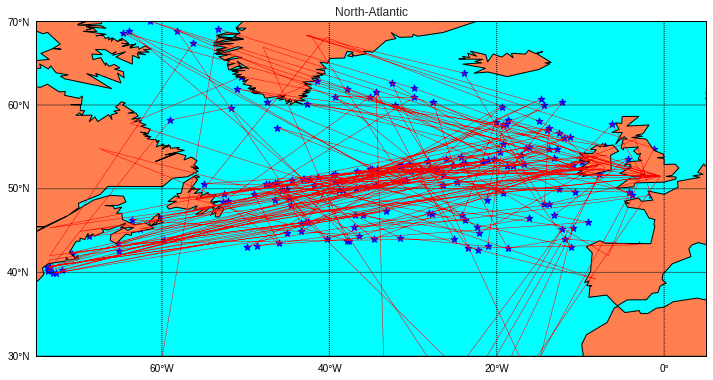

In [24]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5

#basemap project is imported from the mpl_toolkit
m = Basemap(projection='cyl',llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon,
            lat_1=10,lat_2=20,lat_0=50,lon_0=-10,resolution='c')

m.drawcoastlines()

m.fillcontinents(color='coral',lake_color='aqua')  # add coastlines
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)
m.drawmapboundary(fill_color='aqua')

#importing given latitude and longitude data
x, y = m(LongitudeData, LatitudeData)  # transform coordinates  
plt.scatter(x, y, 50, marker='*', color='blue') 

plt.plot(x, y, linewidth = 0.5, linestyle = "-", color = "red")

plt.title("North-Atlantic")
plt.show()

**DIJKSTRS'S ALGORITHM:**

We now use Dijkstra's algorithm to find the single objective optimisation which is from a single node. This is a very simple process of finding the shortest path with minimal distance from source to destination. It takes up input data as a graph in weights with non-negative, we initial with a source point as starting node and a final destination as a target node point, that returns to the least path distance. This algorithm has two denotation labels with a node from the starting node and the destination node with the respective previous node, as shown in the detailed figure. 


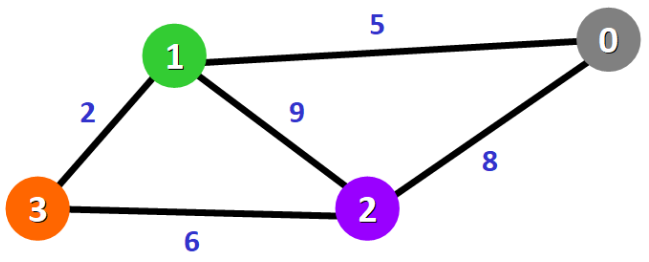

**FITTING THE DIJKSTRS'S ALGORITHM:** 

Follow up on the code for more detailed steps of execution.

In [25]:
pip install networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#DIJKSTRAS ALGORITHM
import networkx as nx
import csv
from collections import defaultdict
import math 
from tabulate import tabulate
import bisect

g = nx.Graph()

##### Calculating the distance #####
def calculate_distance(trans_Flight, rec_Flight):  #distance calculation with starting and destination flight
    R_L = 6371000 #radius as same we predicted the distance before

#fitting the nodes to equate the distance    
    trans_Alt = trans_Flight[0]
    trans_Lat = trans_Flight[1]
    trans_Lon = trans_Flight[2]
    
    rec_Alt = rec_Flight[0]
    rec_Lat = rec_Flight[1]
    rec_Lon = rec_Flight[2]
    
    pXa = (R_L + trans_Alt) * math.cos(trans_Lat) * math.cos(trans_Lon)
    pYa = (R_L + trans_Alt) * math.cos(trans_Lat) * math.sin(trans_Lon)
    pZa = (R_L + trans_Alt) * math.sin(trans_Lat)
    
    pXb = (R_L + rec_Alt) * math.cos(rec_Lat) * math.cos(rec_Lon)
    pYb = (R_L + rec_Alt) * math.cos(rec_Lat) * math.sin(rec_Lon)
    pZb = (R_L + rec_Alt) * math.sin(rec_Lat)
    
    DISt_val = abs(pXa-pXb)**2 + abs(pYa-pYb)**2 + abs(pZa-pZb)**2
    
    return math.sqrt(DISt_val);

##### finding the transmission rate in KM #####
def transmission_rate(Distance_km):
    start = (transmissionTable[0][2])
    if(Distance_km>740):
        return 0
    if(Distance_km <= start):
        return transmissionTable[0][3]
    transmissionTable.sort(key=lambda r: r[2]) 
    keys = [r[2] for r in transmissionTable]
    i = bisect.bisect_right(keys, Distance_km)
    if i:
        return transmissionTable[i-1][3]
    raise ValueError

###### Finding shortest distance from location a and location b ######
def shortestLocation(Location_a, Location_b):    
    sp = dict(nx.all_pairs_dijkstra_path(g))
    print(dict(nx.all_pairs_dijkstra_path_length(g))[Location_a][Location_b])
    lsp = sp[Location_a][Location_b]
    least = float('inf')
    for i in range(len(lsp)-1):
        ind = lsp[i]
        nxt = lsp[i+1]
        val = g[ind][nxt]['weight']
        if(val < least):
            least = val
    return least

###### print the aircraft name as final result we that it's index value #######
def Get_Index_Val(Aircraft_name):
    for ind, fName in connectedFlights.items():
        if Aircraft_name == fName:
            return ind  
        
##### printing the shortest route with the dijkstra's optimisation technique ######
def Print_ShortestRoute(path):
    returnString = []
    for lst in path:
        listOfTuples = []
        x1 = lst[0]            #  path of one node
        x2 = lst[len(lst)-1]    # path of previous node
        finalStr = "" 
        stn = "'routing path': " 
# finding the best path lenght 
        for i in range(len(lst)):
            if(i+1<len(lst)):
                firstIndex = lst[i]   #first index
                nxtIndex = lst[i+1]   #next index
                
                h = dict(nx.all_pairs_dijkstra_path_length(g))[firstIndex][nxtIndex]
                #checking for connectedflights of the next index values
                destTuple = (connectedFlights[nxtIndex],h)  
                #added it to the destination
                listOfTuples.append(destTuple)
                #final results are stored
                finalStr = ",".join([finalStr , str(destTuple)])
        #modulating the output with the shortest locatioon and name it as end-to-end data rate
        st = " End-to-end data rate: " + str(shortestLocation(x1,x2))
        finalStr = ",".join([finalStr , st])[1:]
        finalS = "{ "+str(connectedFlights[x1]) + ", routing path: "+ finalStr+ " }"
        #final output is added
        returnString.append(finalS)
    return returnString



**IMPLEMENTING THE DIJKSTRS'S ALGORITHM:**

In [39]:
#Solution

import time
start_time = time.time()
data = []
g = nx.Graph()
jsonDatas = []
connectedFlights = {}

#Extract the data from file into a list. data
with open('NA_13_Jun_29_2018_UTC13.CSV') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        dataTuple = ()
        for (i,v) in enumerate(row):
            tempTup = (v,)
            dataTuple = dataTuple + tempTup
            #columns[i].append(v)
        data.append(dataTuple)  
    LHR = ('LHR', '1530277200', '81.73', '51.4700', '-0.4543')
    EWR = ('EWR', '1530277200', '8.72', '40.6895', '-74.1745')
    data.append(LHR)
    data.append(EWR)
        
    #Loop through Data, extract out the coordinates.
    for row in data:
        origin = row[0]
        timestamp1 = row[1]
        altitude_1 = float(row[2]) * 0.3048
        latitude_1 = float(row[3])
        longitude_1 = float(row[4])
        jsd = []
        initial_aircraft = (altitude_1,latitude_1,longitude_1)
        for r in data:
            destination = r[0]
            timestamp2 = r[1]
            altitude_2 = float(r[2]) * 0.3048
            latitude_2 = float(r[3])
            longitude_2 = float(r[4])
            destin_aircraft = (altitude_2,latitude_2,longitude_2)
            Distance_m = calculate_distance(initial_aircraft,destin_aircraft)
            distance = Distance_m/1000
            throughPut = transmission_rate(distance)
            
##### finding the data out form the throughput and distance with zero ######
            if(throughPut==0 or distance==0):
                continue;
            d = {
                "DestFlight Number": destination,
                "Distance": distance,
                "Throughput": throughPut
                }
            
            jsd.append(d)
            #print(jsd)
        jsonData = {origin: jsd}
        jsonDatas.append(jsonData) 
        
   # print(jsonDatas)    
    
    for i in range(len(jsonDatas)):
        fligtNum = list(jsonDatas[i])[0]
        connectedFlights[i] = fligtNum
        
######  Add Nodes to Graph  ######
    length = len(connectedFlights)
    for i in range(length):
        g.add_nodes_from([
            (i, {"flightName": connectedFlights[i]})   
    ])

    
    for i in range(len(jsonDatas)):
        fligtNum = list(jsonDatas[i])[0]
        x = connectedFlights[i]
        #print(fligtNum)
        flightAIndex = i
        connectingFlightIndex = Get_Index_Val(fligtNum)
        connections = jsonDatas[i][x]
        for j in range(len(connections)):
            rDist = connections[j]['Distance']
            rFName = connections[j]['DestFlight Number']
            rThrp = connections[j]['Throughput']
            destFlightIndex = Get_Index_Val(rFName)

#####   Add Edges  #####
            g.add_edge(flightAIndex, destFlightIndex, weight=rThrp)
            
#### using shortpath algorithm  ####
spl = dict(nx.all_pairs_dijkstra_path_length(g))
shortestPath = dict(nx.all_pairs_dijkstra_path(g))

#### init the Ground station lhr and ewr
G_StationA = Get_Index_Val('LHR')
G_StationB = Get_Index_Val('EWR')

# finding the path using before ment shortestpath algorithm form lhr
pathToLHR = list(shortestPath[G_StationA].values())[1:]
for lst in pathToLHR:
    lst.reverse()

# finding the path using before ment shortestpath algorithm form ewr
pathToEWR = list(shortestPath[G_StationB].values())[1:]
for lst in pathToEWR:
    lst.reverse()

#### printing the shortest paths ######
print('*******************************************')
print(Print_ShortestRoute(pathToLHR))
print('*******************************************')
print(Print_ShortestRoute(pathToEWR))
print("--- %s seconds ---" % (time.time() - start_time))



*******************************************
31.895
63.79
63.79
63.79
31.895
31.895
63.79
95.685
75.4
95.865
63.79
["{ BA179, routing path: ('LHR', 31.895), End-to-end data rate: 31.895 }", "{ BA225, routing path: ('BA179', 31.895),('LHR', 31.895), End-to-end data rate: 31.895 }", "{ BA239, routing path: ('BA179', 31.895),('LHR', 31.895), End-to-end data rate: 31.895 }", "{ BA287, routing path: ('BA179', 31.895),('LHR', 31.895), End-to-end data rate: 31.895 }", "{ DL17, routing path: ('LHR', 31.895), End-to-end data rate: 31.895 }", "{ DL177, routing path: ('LHR', 31.895), End-to-end data rate: 31.895 }", "{ UA919, routing path: ('BA179', 31.895),('LHR', 31.895), End-to-end data rate: 31.895 }", "{ BA49, routing path: ('BA225', 31.895),('BA179', 31.895),('LHR', 31.895), End-to-end data rate: 31.895 }", "{ DL133, routing path: ('BA179', 43.505),('LHR', 31.895), End-to-end data rate: 31.895 }", "{ DL87, routing path: ('BA179', 63.97),('LHR', 31.895), End-to-end data rate: 31.895 }", "{ AA

**STORE THE RESULT IN JSON FILE:**

In [ ]:
import json
aDict = Print_ShortestRoute(pathToLHR)
jsonString = json.dumps(aDict)
jsonFile = open("dijkstra's_single-obj_result.json", "w")
jsonFile.write(jsonString)
jsonFile.close()

**CONVERTING DATASET TO TSP:**

I want to explore a bit more in ACO with the given data by experimenting with the TSP optimizer in the Ant Colony Optimization algorithm. To execute the TSP optimizer with our data, I converted the CSV file to TSP.

**TSP OPTIMISATION USING ACO:**

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# TSP

def getTspData(tsp):
    # Open input file
    infile = open(tsp, 'r')

    # Read instance
    name = infile.readline().strip().split()[1]                     # NAME
    type = infile.readline().strip().split()[1]                     # TYPE
    comment = infile.readline().strip().split()[1]                  # COMMENT
    dimension = infile.readline().strip().split()[1]                # DIMENSION
    edge_weight_type = infile.readline().strip().split()[1]         # EDGE_WEIGHT_TYPE
    node_coord_section = []                                         # NODE_COORD_SECTION
    infile.readline()

    # Read node coord section and store its x, y coordinates
    for i in range(0, int(dimension)):
        x, y = infile.readline().strip().split()[1:]
        node_coord_section.append([float(x), float(y)])

    # Close input file
    infile.close()

    # File as dictionary
    return {
        'name': name,
        'type': type,
        'comment': comment,
        'dimension': dimension,
        'edge_weight_type': edge_weight_type,
        'node_coord_section': node_coord_section
    }

def displayTspHeaders(dict):
    print('\nName: ', dict['name'])
    print('Type: ', dict['type'])
    print('Comment: ', dict['comment'])
    print('Dimension: ', dict['dimension'])
    print('Edge Weight Type: ', dict['edge_weight_type'], '\n')

#  ACO

def runAcoTsp(space, iterations = 80, colony = 50, alpha = 1.0, beta = 1.0, del_tau = 1.0, rho = 0.5):
#### Find inverted distances for all nodes ####
    inv_distances = inverseDistances(space)

#### Add beta algorithm parameter to inverted distances ####
    inv_distances = inv_distances ** beta

#### Empty pheromones trail ####
    pheromones = np.zeros((space.shape[0], space.shape[0]))

#### Empty minimum distance and path ####
    min_distance = None
    min_path = None

#### For the number of iterations  ####
    for i in range(iterations):
        # Initial random positions
        positions = initializeAnts(space, colony)

        # Complete a path
        paths = moveAnts(space, positions, inv_distances, pheromones, alpha, beta, del_tau)

        # Evaporate pheromones
        pheromones *= (1 - rho)

        # [3] For each path
        for path in paths:
            # Empty distance
            distance = 0

            # For each node from second to last
            for node in range(1, path.shape[0]):
                # Calculate distance to the last node
                distance += np.sqrt(((space[int(path[node])] - space[int(path[node - 1])]) ** 2).sum())

            # Update minimun distance and path if less nor non existent
            if not min_distance or distance < min_distance:
                min_distance = distance
                min_path = path

        # Copy and append first node to end of minimum path to form closed path
        min_path = np.append(min_path, min_path[0])

        # Return tuple
        return (min_path, min_distance)


def inverseDistances(space):
    # Empty multidimensional array (matriz) to distances
    distances = np.zeros((space.shape[0], space.shape[0]))

    # Calculate distance to all nodes to all nodes
    for index, point in enumerate(space):
        distances[index] = np.sqrt(((space - point) ** 2).sum(axis = 1))

    # Floating-point error handling - Setted to known state
    with np.errstate(all = 'ignore'):
        # Invert the distances
        inv_distances = 1 / distances

    # Replace infinity by zero to prevent zero division error
    inv_distances[inv_distances == np.inf] = 0

    # Eta algorithm result, inverted distances
    return inv_distances


def initializeAnts(space, colony):
    # Indexes of initial positions of ants
    return np.random.randint(space.shape[0], size = colony)

def moveAnts(space, positions, inv_distances, pheromones, alpha, beta, del_tau):
    # Empty multidimensional array (matriz) to paths
    paths = np.zeros((space.shape[0], positions.shape[0]), dtype = int) - 1

    # Initial position at node zero
    paths[0] = positions

    # For nodes after start to end
    for node in range(1, space.shape[0]):
        # For each ant
        for ant in range(positions.shape[0]):
            # Probability to travel the nodes
            next_location_probability = (inv_distances[positions[ant]] ** alpha + pheromones[positions[ant]] ** beta /
                                            inv_distances[positions[ant]].sum() ** alpha + pheromones[positions[ant]].sum() ** beta)

            # Index to maximum probability node
            next_position = np.argwhere(next_location_probability == np.amax(next_location_probability))[0][0]

            # Check if node has already been visited
            while next_position in paths[:, ant]:
                # Replace the probability of visited to zero
                next_location_probability[next_position] = 0.0

                # Find the maximum probability node
                next_position = np.argwhere(next_location_probability == np.amax(next_location_probability))[0][0]

            # Add node to path
            paths[node, ant] = next_position

            # Update pheromones (releasing pheromones)
            pheromones[node, next_position] = pheromones[node, next_position] + del_tau

    # Paths taken by the ants
    return np.swapaxes(paths, 0, 1)


**DISPLAYING FILE:**

In [29]:
# Get TSP data
TSP = getTspData('NA_13_Jun_29_2018_UTC13.tsp')

# Display TSP file headers
displayTspHeaders(TSP)


Name:  NA_13_Jun_29_2018_UTC13
Type:  TSP
Comment:  216-
Dimension:  216
Edge Weight Type:  EUC_D 



**SPACE:**

Now, we should coordinate the nodes and plot, which is space.

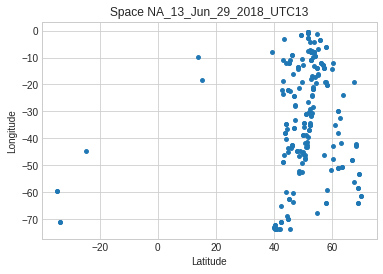

In [30]:
# Get Space
space = np.array(TSP['node_coord_section'])

# Plot nodes
plt.scatter(space[:, 0], space[:, 1], s = 15)

# Plot properties
plt.title('Space {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()



**PLOTTING THE MINIMUM PATH:**

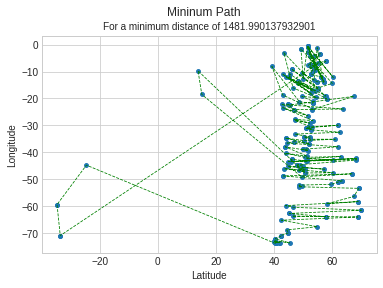

Shortest path [215  78 128 196  54 104 194 192  74 124  60 110 150  15 213  96 146 189
 182  73 123  84 134  75 125  61 111 211 159 175  89 139 207  71 121  91
 141  47   1  69 119  63 113  59 109  24  97 147 202 190  99 149  41  58
 108  38 208 197 172  65 115   2  33  49  39  34  26 170   3  50 100 155
  30  87 137  19  40  11  32   6  31 151  27  55 105  51 101 209  12 201
  35  43   4 185 154 188  36  68 118 157  57 107 205 183  28 176 162  48
  52 102  93 143  92 142  23 181  95 145  70 120  79 129 179 198   0  81
 131 186  77 127  25  14 191 199 174 214 169  10  85 135 167 152 204 187
 210 203  56 106  16  45  13 156 164 153  37 178  21 200 171 177 173  20
  76 126  98 148  83 133  90 140   9  18  29  22  67 117 160   8  86 136
 184  42  72 122  62 112  82 132 180  94 144 158  17  46  53 103 195  80
 130  88 138 206 193 161   5 166 163 168  44 165   7 212  64 114  66 116
 215]
Minimum Distance 1481.990137932901
--- 30.22367525100708 seconds ---


<Figure size 432x288 with 0 Axes>

In [36]:
import time
start_time = time.time()
# Run ACO
min_path, min_distance = runAcoTsp(space)

# Plot path
plt.scatter(space[:, 0], space[:, 1], marker='o', s=15)
plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=0.8, linestyle="--")

# Plot properties
plt.suptitle('Mininum Path')
plt.title('For a minimum distance of {}'.format(min_distance), fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Show plot
plt.show()
plt.close()
print('Shortest path', min_path)
print('Minimum Distance', min_distance)
print("--- %s seconds ---" % (time.time() - start_time))



As the result, the final plotting gives the number of iterations and the predicted shortest route is given in green connective links with calculated minimum distance. 

**PLOTTING SHORTEST PATH:**

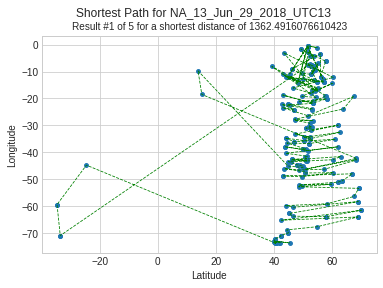

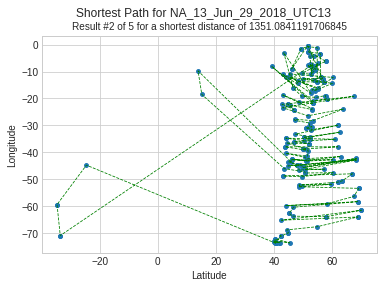

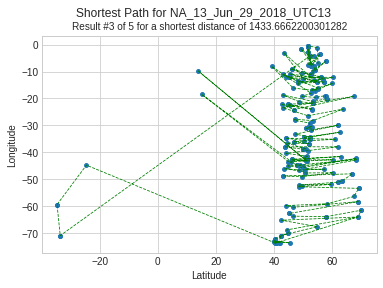

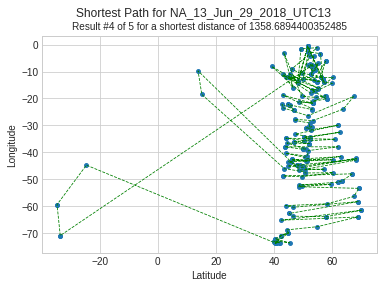

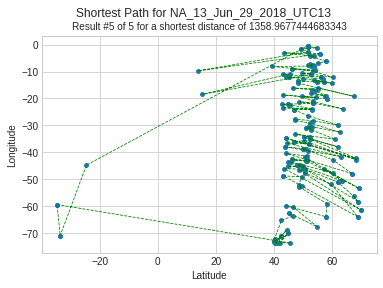

Shortest path [206 161  53 103 166  80 130 195 163 165 168  44  46   7  88 138   5 193
 158 180  62 112  17  42 184  82 132   8  22  29  18  20  98 148  94 144
   9 171 178  37  72 122  21 153  90 140 160  86 136  13 164  45  16  56
 106  83 133 156 200 187 152 167  10  85 135 169  67 117 174 191  25  14
  76 126 214 186  81 131   0  77 127 199 179  70 120  79 129 181 203 210
  95 145 204  92 142  93 143 198  52 102  48 162  23  28 183 205  57 107
 157  36 188 176 185 154   4  43  68 118 201  51 101  31  35   6  27  12
  55 105  19  40  87 137 209  30 155 170  32  50 100  39   2  49 197  38
  26  41 190 151 208  58 108  89 139  91 141 207 159 202  24  65 115  33
  61 111  84 134   3 172 173  73 123 175 182   1  15  99 149  60 110  11
 194  78 128  54 104 213 196 192 215  74 124 189 150  34  96 146 177  75
 125  97 147 211  71 121  47  69 119  63  59 113 109 212  66 116  64 114
 206]
Minimum Distance 1358.9677444683343
Shortest Distance Average for the last 5 results is 1372.97982627308

In [32]:
import time
start_time = time.time()
# Vars
n = 5 
average = 0 

# Repeat
for i in range(n):
    # Call
    min_path, min_distance = runAcoTsp(space)
    average += min_distance 
    
    # Plot path
    plt.scatter(space[:, 0], space[:, 1], marker='o', s=15)
    plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=0.8, linestyle="--")

    # Plot properties
    plt.suptitle('Shortest Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a shortest distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
# Show Average
print('Shortest path', min_path)
print('Minimum Distance', min_distance)
print('Shortest Distance Average for the last {} results is {}'.format(n, average/n))
print("--- %s seconds ---" % (time.time() - start_time))

**RESULTS AND DISCUSSION:**

As we have discussed, researchers are using ACO in applying hard optimisation problems, and dynamic and stochastic concepts concern the variation of multi-objective optimisation. ACO is the major study applied to many various problems. The theoretical vision of the ACO algorithm will help in pursuing in many other problems in the future.

With the obtained results, we can give provision to the passengers to access the internet and these optimisation techniques with the best distance were implemented in forms like single-objective and multiple-objective optimisation in this paper. In many trials, we also noted the ACO had taken much more complicated tasks as real ant movement and Dijkstra's helped in finding one simple optimal path.. 


**CONCLUSION:**

In conclusion, internet access over the cloud can be provided with the paths we found, by multiple-objective routing optimisation has taken a unique feature to retrieve more objective data for every evaluation. And single-objective routing goes through a few trials, which have fixed optimisation. Finally, at the North-Atlantic field, the aircraft can get aeronautic communication between flights and ground stations. In future, I would use the ACO to find the vehile routing problems with the adoptive solution.

**ACKNOWLEDGEMENT**

I thank Professor Jiankang Zhang unit leader, my classmates who helped me to understand the problem and many useful anonymous referees. And thanks to our university and staff members.  

**REFERENCE:**

1) D. Medina and F. Hoffmann, “The airborne Internet,” in S. Plass (ed.),
Future Aeronautical Communications. InTech, 2011, pp. 349–374.

2) E. Sakhaee, A. Jamalipour, and N. Kato, “Aeronautical ad hoc networks,”
in Proc. WCNC 2006 (Las Vegas, NV, USA), Apr. 3-6, 2006, pp. 246–
251.

3) D. S. Lakew, U. Sa’ad, N.-N. Dao, W. Na, and S. Cho, “Routing in flying
ad hoc networks: A comprehensive survey,” IEEE Communi. Surveys &
Tutorials, vol. 22, no. 2, pp. 1071–1120, Secondquarter 2020.

4) Stu¨tzle, T., & Dorigo, M. (1999a). ACO algorithms for the quadratic assignment problem. In D. Corne,
M. Dorigo, & F. Glover (Eds.), New Ideas in Optimization (pp. 33–50). London, McGraw Hill.

5) E.L. Lawler, J.K. Lenstra, A.H.G. Rinnooy Kan, and D.B. Shmoys. The Traveling Salesman. John Wiley andSons, 1986.

6) T. Hanne, On the convergence of multiobjective evolutionary algorithms,
European Journal of Operational Research, no. 117, pp. 553-564, 1999.

7) M. Dorigo et L.M. Gambardella, Ant Colony System : A Cooperative Learning Approach to the TravelingSalesman Problem, IEEE Transactions on Evolutionary Computation, volume 1, numéro 1, pages 53-66, 1997. 

8) J. Cui, S. X. Ng, D. Liu, J. Zhang, A. Nallanathan, L. Hanzo, “Multiobjective optimization for integrated ground-air-space networks: current
research and future challenges,” IEEE Vehicular Technology Magazine,
vol. 16, No. 3, pp. 88–98, Jun. 2021.

9) Stu¨tzle, T., & Linke, S. (2002). Experiments with variants of ant algorithms. Mathware and Soft Computing, 9(2–3), 193

10) Talan K, and Bamnote G R 2015 Shortest Path Finding Using a Star Algorithm and Minimum 
Weight Node First Principle. Int. J. of Innovative Res. in Computer and Communication 
Engineering 3 2 1258. 

